# Kaggle - Tabular Playground Series - Jan 2022

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime

from prophet import Prophet

# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/test.csv'
submission_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/sample_submission.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
#modify date column to datetime

train['date'] = pd.to_datetime(train['date'])

In [5]:
#verify the change in date column

train.dtypes

row_id               int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

In [6]:
#incorporate year and day year

train['year'] = train['date'].dt.year
train['day_year'] = train['date'].dt.dayofyear #Number of day from 1 to 365

train.head()

,row_id,date,country,store,product,num_sold,year,day_year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1


In [7]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [8]:
#change to datetime, incorporate year and num_sold column with cero values

test['date'] = pd.to_datetime(test['date'])

test['year'] = test['date'].dt.year
test['day_year'] = test['date'].dt.dayofyear

test['num_sold'] = 0
test.head()

,row_id,date,country,store,product,year,day_year,num_sold
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,2019,1,0
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,2019,1,0
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,2019,1,0
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,2019,1,0
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,2019,1,0


In [9]:
#number of days in test dataset: This is importante because maybe some year in train dataset have 366 days

len(test['date'].unique())

365

In [10]:
#submit dataset

submit = pd.read_csv(submission_path)
submit.head()

,row_id,num_sold
0,26298,100
1,26299,100
2,26300,100
3,26301,100
4,26302,100


In [11]:
#countrys

countrys = train['country'].unique()
countrys

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [12]:
#stores

stores = train['store'].unique()
stores

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [13]:
#products

products = train['product'].unique()
products

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

# 3. Model 1

In [78]:
#empty dataframe
df = pd.DataFrame(columns = ['row_id', 'num_sold'])

#loop to iterate in every combination country/store/product
for i in countrys:
    for j in stores:
        for k in products:
            filt = (train['country'] == 'Finland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Mug') #filter for train dataset
            #filter train / test for every filter combination
            f = train[filt]
            f_sub = f[['date','num_sold']]
            f_sub.rename(columns={'date':'ds','num_sold':'y'},inplace=True)
            
            g = test[filt]
            g_sub = g[['row_id','date']]
            g_sub.rename(columns={'date':'ds'},inplace=True)
            
            model = Prophet()
            model.fit(f_sub[['ds','y']])
            
            forecast = m.predict(pd.DataFrame(g_sub['ds']))
            pred = pd.DataFrame(forecast['yhat'])
            
            pred_df = pd.concat([pd.DataFrame(g['row_id']),pred],axis=1)
            
            df = pd.concat([df,pred_df]) #concat dataframes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyboardInterrupt: 

In [87]:
            filt = (train['country'] == 'Finland') & (train['store'] == 'KaggleMart') & (train['product'] == 'Kaggle Mug') #filter for train dataset
            #filter train / test for every filter combination
            f = train[filt]
            f_sub = f[['date','num_sold']]
            f_sub.rename(columns={'date':'ds','num_sold':'y'},inplace=True)
            
            g = test[filt]
            g_sub = g[['row_id','date']]
            g_sub.rename(columns={'date':'ds'},inplace=True)
            
            model = Prophet()
            model.fit(f_sub[['ds','y']])
            
            forecast = m.predict(pd.DataFrame(g_sub['ds']))
            pred = pd.DataFrame(forecast['yhat'])
            
            pred_df = pd.concat([pd.DataFrame(g_sub['row_id']),pred],axis=1)
            
            df = pd.concat([df,pred_df]) #concat dataframes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
pred

,yhat
0,355.637059
1,355.648750
2,352.910841
3,360.835555
4,393.574159
...,...
360,378.219457
361,419.326611
362,422.729799
363,374.670653


In [91]:
pred_df

,row_id,yhat
0,26298.0,355.637059
1,NaN,355.648750
2,NaN,352.910841
3,NaN,360.835555
4,NaN,393.574159
...,...,...
6480,32778.0,NaN
6498,32796.0,NaN
6516,32814.0,NaN
6534,32832.0,NaN


In [92]:
g_sub['row_id']

0       26298
18      26316
36      26334
54      26352
72      26370
        ...  
6480    32778
6498    32796
6516    32814
6534    32832
6552    32850
Name: row_id, Length: 365, dtype: int64

In [90]:
df

,row_id,num_sold,yhat
0,26298.0,NaN,355.637059
1,NaN,NaN,355.648750
2,NaN,NaN,352.910841
3,NaN,NaN,360.835555
4,NaN,NaN,393.574159
...,...,...,...
6480,32778.0,NaN,NaN
6498,32796.0,NaN,NaN
6516,32814.0,NaN,NaN
6534,32832.0,NaN,NaN


In [ ]:
#submmit file

df.sort_values(by=['row_id'],inplace=True)
df.reset_index(drop=True, inplace=True)
df.to_csv('modelo_1.csv', index=False)

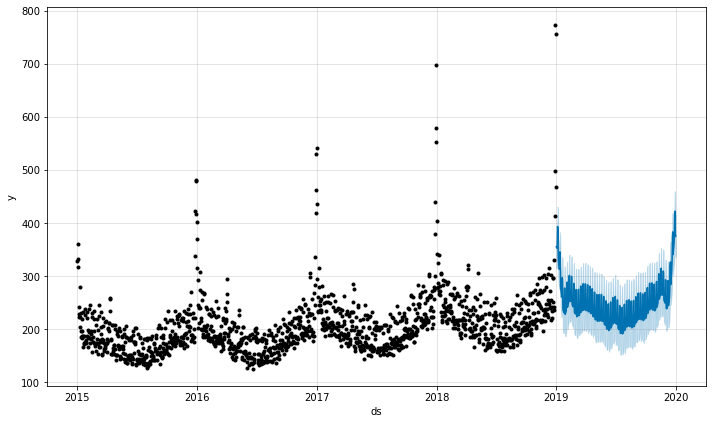

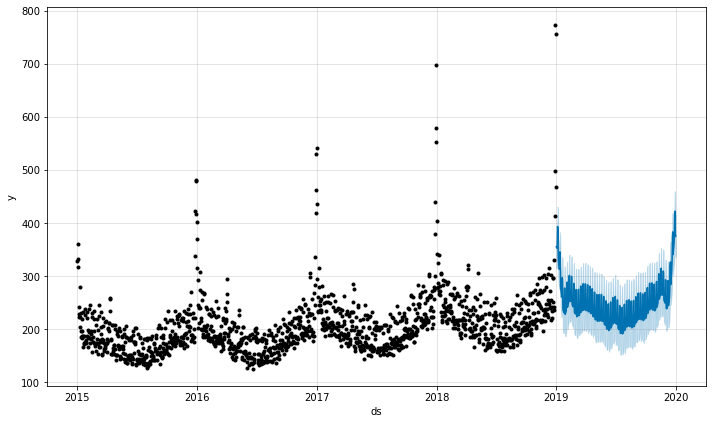

In [65]:
m.plot(forecast)